# Look at Month-long PSD
read from pre-computed spectrogram

In [2]:
import ooipy
import numpy as np
import Noise_Interferometry
import spec_tools
from matplotlib import pyplot as plt
import pickle

%load_ext autoreload
%autoreload 2

In [36]:
year = 2017
month = 6
node = 'Central_Caldera'
month_hours = spec_tools.get_hour_index_array(year%4==0)
spec_start, spec_end = month_hours[month-1], month_hours[month]
spec_dir = f'/Volumes/Ocean_Acoustics/Spectrograms/{node}/{year}/'

times, freq, values = spec_tools.merge(spec_start, spec_end, spec_dir)

values = np.ma.masked_array(values, np.isnan(values))

[==============================                                          ]  41%

KeyboardInterrupt: 

In [32]:
# inputs that work
print(spec_start, spec_end, spec_dir)

3624 4344 /Volumes/Ocean_Acoustics/Spectrograms/Central/2017/


In [33]:
PSD = np.mean(values, axis=0)

(0.0, 100.0)

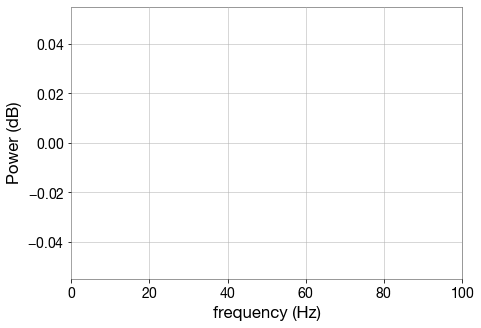

In [34]:
fig = plt.figure(figsize=(7,5))
plt.rcParams['font.size'] = '14'
plt.plot(freq, PSD)
plt.grid()
plt.ylabel('Power (dB)')
plt.xlabel('frequency (Hz)')
plt.grid()
plt.xlim([0, 100])

In [35]:
values

masked_array(data =
 [[-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --]],
             mask =
 [[ True  True  True ...,  True  True  True]],
       fill_value = 1e+20)

## Loading yearlong figure

In [44]:
filename = '/Volumes/Ocean_Acoustics/Spectrograms/Central_Caldera/6_year_spectrogram.pkl'

with open(filename, 'rb') as f:
    spec = pickle.load(f)

values = np.ma.masked_array(spec.values, np.isnan(spec.values))

In [45]:
yearlong_psd = np.mean(values, axis=0)

5.859375


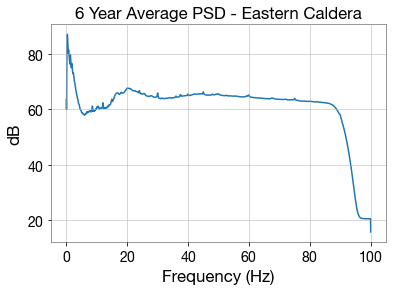

In [47]:
plt.plot(spec.freq, yearlong_psd)
plt.ylabel('dB')
plt.xlabel('Frequency (Hz)')
plt.title('6 Year Average PSD - Eastern Caldera')

print(spec.freq[np.argmin(yearlong_psd[1:1000])])

## Playing with monthlong script

[                                                                        ] N/A%Merging for Central_Caldera, 2017-6...

[======================================================================= ]  98%

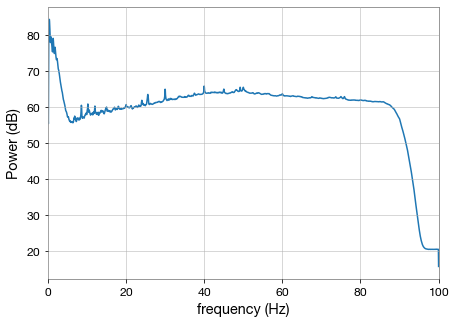

In [22]:
fig, ax = spec_tools.monthly_psds([2017], [6], ['Central_Caldera'], savefig=False)

In [23]:
plt.sca(ax)
plt.show()
ax.set_xlim([0, 30])
plt.grid()

ValueError: Axes instance argument was not found in a figure